In [0]:
import numpy as np
import torch

In [0]:
a = [i for i in range(10**8)]

In [68]:
%%time
sum(a)

CPU times: user 863 ms, sys: 2.91 ms, total: 866 ms
Wall time: 862 ms


4999999950000000

In [0]:
a = np.arange(10**8)

In [70]:
%%time
a.sum()

CPU times: user 133 ms, sys: 1.64 ms, total: 135 ms
Wall time: 134 ms


4999999950000000

In [0]:
import torch

In [0]:
a = np.arange(10**8)

In [0]:
p = torch.from_numpy(a)


In [74]:
%%time
p.sum()

CPU times: user 88.5 ms, sys: 404 µs, total: 88.9 ms
Wall time: 88.6 ms


tensor(4999999950000000)

- Load Tensor
- Torch <-> Numpy
- Torch Operations
- 2D Tensors, 3D Tensors
- Matrix multiplication
- Finding Gradient (slope, derivative)
- Implement LR using Pytorch and Scikit-Learn

In [0]:
import torch

In [76]:
torch.tensor([1.1])

tensor([1.1000])

In [77]:
torch.tensor(1.)

tensor(1.)

In [0]:
a = torch.tensor([1,2,3])

In [79]:
a.dtype

torch.int64

In [0]:
a = torch.tensor([[1,2,3],[3,2,1]])

In [81]:
a.dtype

torch.int64

In [82]:
a.size()

torch.Size([2, 3])

# Matrix Multiplications

In [0]:
x = torch.tensor([1,2,3])
w = torch.tensor([3,2,1])

In [84]:
x@w

tensor(10)

In [85]:
torch.matmul(x,w)

tensor(10)

# Finding Gradient

In [0]:
x = torch.tensor(2., requires_grad=True)
y = torch.tensor(3., requires_grad=True)

In [0]:
z = 2*x**2 + 3*y**3

In [0]:
z.backward()

In [89]:
x.grad

tensor(8.)

In [90]:
y.grad

tensor(81.)

# Linear Regresson

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = torch.ones(100,2)

In [120]:
x.size()

torch.Size([100, 2])

In [121]:
x[:,0].uniform_()

tensor([0.5119, 0.1360, 0.3367, 0.9146, 0.9598, 0.4673, 0.4459, 0.2818, 0.1306,
        0.8258, 0.4211, 0.0556, 0.5635, 0.3301, 0.3057, 0.2148, 0.2844, 0.9037,
        0.5264, 0.3075, 0.8967, 0.3900, 0.5532, 0.6986, 0.3670, 0.7781, 0.2848,
        0.5266, 0.5311, 0.4194, 0.4851, 0.8560, 0.3297, 0.1276, 0.5867, 0.0616,
        0.1313, 0.5458, 0.0871, 0.6726, 0.0313, 0.8071, 0.7910, 0.4739, 0.5535,
        0.1746, 0.6893, 0.8314, 0.7123, 0.0054, 0.6820, 0.7725, 0.0139, 0.0980,
        0.5325, 0.7382, 0.4191, 0.0155, 0.6499, 0.6415, 0.4859, 0.9606, 0.8431,
        0.1012, 0.1937, 0.1806, 0.1804, 0.3543, 0.8078, 0.1936, 0.9556, 0.1203,
        0.7813, 0.6770, 0.6468, 0.2591, 0.2421, 0.1383, 0.4970, 0.1710, 0.1819,
        0.6152, 0.6195, 0.9759, 0.2452, 0.1917, 0.7139, 0.7407, 0.6849, 0.1904,
        0.5871, 0.5456, 0.9706, 0.9001, 0.7994, 0.6886, 0.9296, 0.0636, 0.2510,
        0.3629])

In [122]:
x[:5]

tensor([[0.5119, 1.0000],
        [0.1360, 1.0000],
        [0.3367, 1.0000],
        [0.9146, 1.0000],
        [0.9598, 1.0000]])

In [0]:
w = torch.tensor([3.,2.])

In [0]:
y = x@w + torch.rand(100)

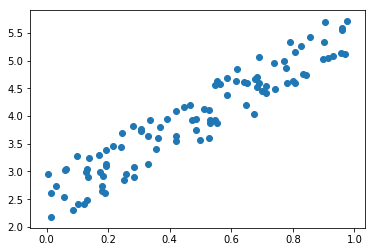

In [125]:
plt.scatter(x[:,0].numpy(), y.numpy())
#command

In [0]:
w = torch.tensor([1.,1.])

In [0]:
y_hat = x@w

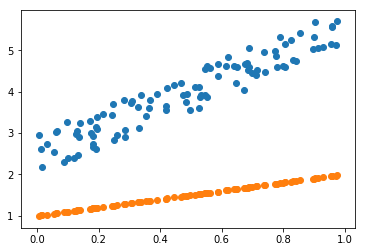

In [128]:
plt.scatter(x[:,0].numpy(), y.numpy())
plt.scatter(x[:,0].numpy(), y_hat.numpy())
#command

In [0]:
def mse(y,y_hat):
    return ((y-y_hat)**2).mean()

In [130]:
mse(y,y_hat)

tensor(6.5704)

In [0]:
import torch.nn as nn

In [0]:
w = nn.Parameter(w)

In [133]:
w

Parameter containing:
tensor([1., 1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@w
    loss = mse(y, y_hat)
    loss.backward()
    with torch.no_grad():
        w.sub_(lr*w.grad)
        w.grad.zero_()

In [0]:
lr = 0.05

In [0]:
update()

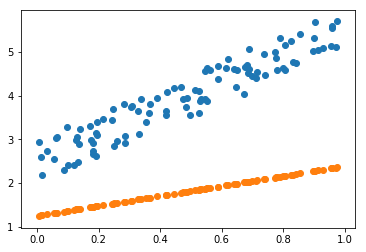

In [137]:
plt.scatter(x[:,0].numpy(), y.numpy())
plt.scatter(x[:,0].numpy(), (x@w).detach().numpy())

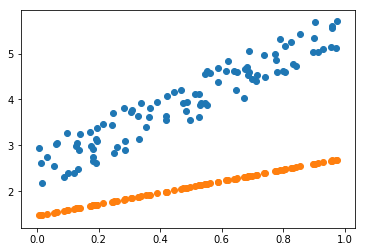

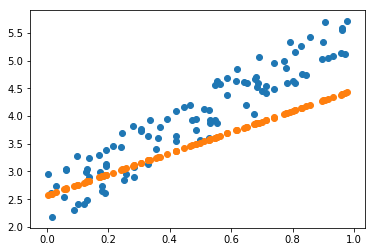

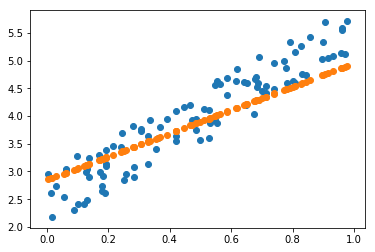

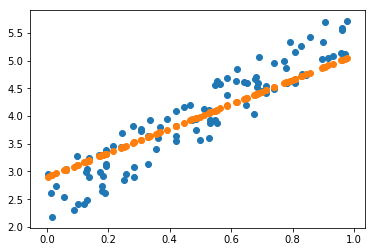

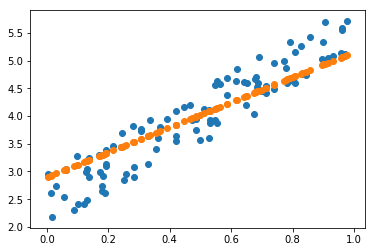

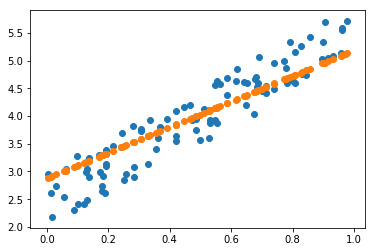

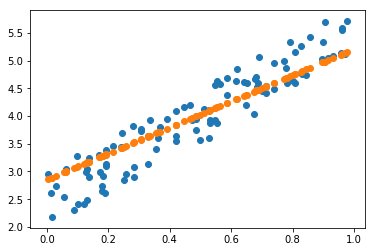

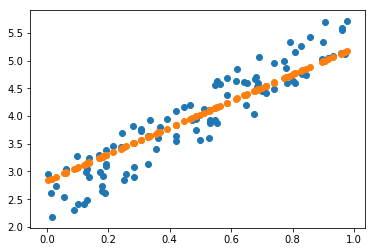

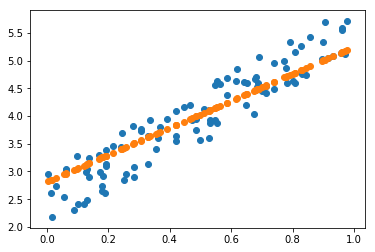

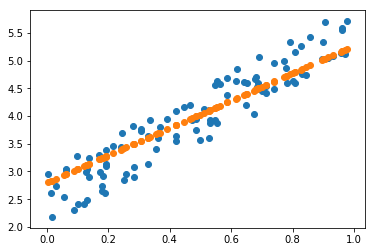

In [138]:
for i in range(100):
    update()
    if i %10 ==0:
        plt.figure()
        plt.scatter(x[:,0].numpy(), y.numpy())
        plt.scatter(x[:,0].numpy(), (x@w).detach().numpy())


In [116]:
w

Parameter containing:
tensor([2.0179, 2.7598], requires_grad=True)

In [117]:
mse(y,x@w)

tensor(0.1949, grad_fn=<MeanBackward0>)